<a href="https://colab.research.google.com/github/JulioLaz/leader_selection/blob/main/BX_encuesta_july2024_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials

scope = ["https://spreadsheets.google.com/feeds", "https://www.googleapis.com/auth/drive"]
creds = ServiceAccountCredentials.from_json_keyfile_name('/content/drive/MyDrive/API-GOOGLE/deep-aileron-415712-2d04ed904a91.json', scope) # Autenticar y crear una instancia del cliente
client = gspread.authorize(creds)
spreadsheet_id = '1tAsZZvSyZhVXi5s1gH789BZKMBfDNwX0LnVRhBMjpns' # Abrir la hoja de cálculo por el ID:
sheet = client.open_by_key(spreadsheet_id)
worksheet = sheet.get_worksheet(0)# Seleccionar la hoja (worksheet)  # Puedes usar el índice de la hoja o su nombre
data = worksheet.get_all_records() # Obtener todos los registros de la hoja
df = pd.DataFrame(data)
df.head()

,Marca temporal,Dirección de correo electrónico,Puntuación,Experiencia [En Data Science],Experiencia [En liderar grupos],Código,Python,Extracción,Limpieza,Análisis Exploratorio,Visualización,Habilidades blandas,Cualidades [Empatía],Cualidades [Colaboración],Cualidades [Adaptabilidad],Cualidades [Flexibilidad],Cualidades [Proactividad],Grupo
0,7/7/2024 21:35:01,julio@gmail.com,,nada,mucha,Ninguna de las anteriores!,9,7,6,4,3,4,media,muy buena,media,poca,media,1
1,7/7/2024 21:38:11,juan@gmail.com,,poca,media,Ninguna de las anteriores,4,9,2,10,3,8,poca,media,muy buena,media,media,1
2,7/7/2024 21:52:45,pedro@gmail.com,5 / 5,nada,nada,"Si tengo una cuenta en GitHub, Si utilizo algú...",4,7,3,6,6,3,poca,media,media,media,muy buena,1
3,7/7/2024 21:54:44,pablo@gmail.com,0 / 10,poca,poca,Ninguna de las anteriores,5,6,6,6,5,6,media,muy buena,media,muy buena,muy buena,1
4,7/7/2024 21:55:36,ramiro@gmail.com,0 / 10,nada,poca,Ninguna de las anteriores,2,2,3,3,4,6,muy buena,muy buena,muy buena,muy buena,muy buena,2


In [17]:

def calculate_code(value):
    code = 0
    if 'GitHub' in value:
        code += 5
    if 'editor' in value:
        code += 5
    if 'Ninguno' in value:
        code = 0
    return code

df['Code'] = df['Código'].apply(calculate_code)

exp_replacement_dict = {
    'nada': 0,
    'poca': 3,
    'media': 6,
    'mucha': 10
}
cualidades_replacement_dict = {
    'poca': 3,
    'media': 6,
    'muy buena': 10
}
exp_columns = ['Experiencia  [En Data Science]', 'Experiencia  [En liderar grupos]']
for column in exp_columns:
    df[column] = df[column].replace(exp_replacement_dict)

cualidades_columns=[['Cualidades [Empatía]', 'Cualidades [Colaboración]', 'Cualidades [Adaptabilidad]','Cualidades [Flexibilidad]', 'Cualidades [Proactividad]']]
for column in cualidades_columns:
    df[column] = df[column].replace(cualidades_replacement_dict)

df['Nombre'] = df['Dirección de correo electrónico'].str.split('@').str[0]

df = df.drop('Código', axis=1)
df = df.drop('Puntuación', axis=1)
df

,Marca temporal,Dirección de correo electrónico,Experiencia [En Data Science],Experiencia [En liderar grupos],Python,Extracción,Limpieza,Análisis Exploratorio,Visualización,Habilidades blandas,Cualidades [Empatía],Cualidades [Colaboración],Cualidades [Adaptabilidad],Cualidades [Flexibilidad],Cualidades [Proactividad],Grupo,Code,Nombre
0,7/7/2024 21:35:01,julio@gmail.com,0,10,9,7,6,4,3,4,6,10,6,3,6,1,0,julio
1,7/7/2024 21:38:11,juan@gmail.com,3,6,4,9,2,10,3,8,3,6,10,6,6,1,0,juan
2,7/7/2024 21:52:45,pedro@gmail.com,0,0,4,7,3,6,6,3,3,6,6,6,10,1,10,pedro
3,7/7/2024 21:54:44,pablo@gmail.com,3,3,5,6,6,6,5,6,6,10,6,10,10,1,0,pablo
4,7/7/2024 21:55:36,ramiro@gmail.com,0,3,2,2,3,3,4,6,10,10,10,10,10,2,0,ramiro
5,7/7/2024 22:09:55,alberto@gmail.com,0,3,3,6,6,3,5,6,3,3,3,3,3,2,5,alberto
6,7/7/2024 23:12:10,eliseagomez43@gmail.com,3,3,1,5,5,5,1,2,10,10,10,10,10,2,0,eliseagomez43
7,7/7/2024 23:30:10,luci@gmail.com,3,0,5,6,4,7,7,4,6,6,6,10,10,2,0,luci
8,7/7/2024 23:32:49,vivi@gmail.com,3,6,5,8,4,7,6,6,3,6,10,6,3,2,0,vivi


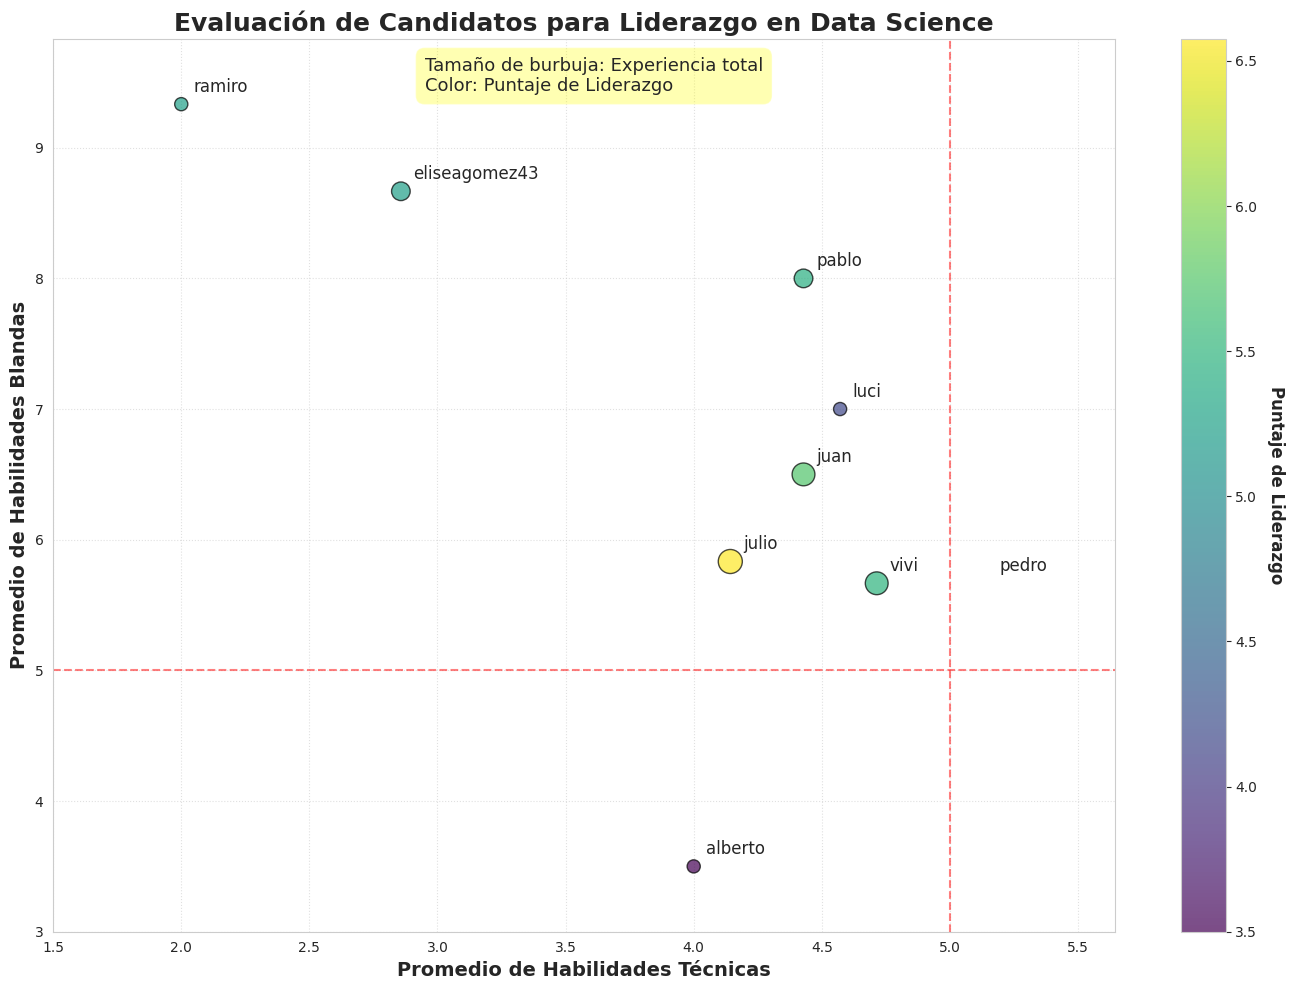

In [18]:


df['Promedio_Tecnicas'] = df[['Experiencia  [En Data Science]', 'Python', 'Extracción', 'Limpieza', 'Análisis Exploratorio', 'Visualización','Code']].mean(axis=1)
df['Promedio_Blandas'] = df[['Habilidades blandas', 'Cualidades [Empatía]', 'Cualidades [Colaboración]', 'Cualidades [Adaptabilidad]', 'Cualidades [Flexibilidad]', 'Cualidades [Proactividad]']].mean(axis=1)

df['Puntaje_Liderazgo'] = (df['Experiencia  [En liderar grupos]'] * 0.3 +
                           df['Promedio_Tecnicas'] * 0.3 +
                           df['Promedio_Blandas'] * 0.4)

sns.set_style("whitegrid")
plt.figure(figsize=(14, 10),facecolor='none')

scatter = plt.scatter(df['Promedio_Tecnicas'],
                      df['Promedio_Blandas'],
                      s=(df['Experiencia  [En Data Science]'] + df['Experiencia  [En liderar grupos]']) * 30,
                      c=df['Puntaje_Liderazgo'],
                      cmap='viridis',
                      alpha=0.7,
                      edgecolors='black',
                      linewidth=1)

for i, txt in enumerate(df['Nombre']):
    plt.annotate(txt, (df['Promedio_Tecnicas'][i], df['Promedio_Blandas'][i]),
                 xytext=(9,9), textcoords='offset points',
                 fontsize=12, fontweight='normal',
                 )

plt.xlabel('Promedio de Habilidades Técnicas', fontsize=14, fontweight='bold')
plt.ylabel('Promedio de Habilidades Blandas', fontsize=14, fontweight='bold')
plt.title('Evaluación de Candidatos para Liderazgo en Data Science', fontsize=18, fontweight='bold')

cbar = plt.colorbar(scatter)
cbar.set_label('Puntaje de Liderazgo', rotation=270, labelpad=20, fontsize=12, fontweight='bold')

handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6,
                                          func=lambda s: s/30,
                                          num=4)

plt.axhline(y=5, color='red', linestyle='--', alpha=0.5, linewidth=1.5)
plt.axvline(x=5, color='red', linestyle='--', alpha=0.5, linewidth=1.5)

plt.xlim(df['Promedio_Tecnicas'].min() - 0.5, df['Promedio_Tecnicas'].max() + 0.5)
plt.ylim(df['Promedio_Blandas'].min() - 0.5, df['Promedio_Blandas'].max() + 0.5)

plt.grid(True, linestyle=':', alpha=0.6)

plt.text(0.35, 0.98, 'Tamaño de burbuja: Experiencia total\nColor: Puntaje de Liderazgo',
         transform=plt.gca().transAxes, fontsize=13, verticalalignment='top',
         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.3))

plt.tight_layout()
plt.show()

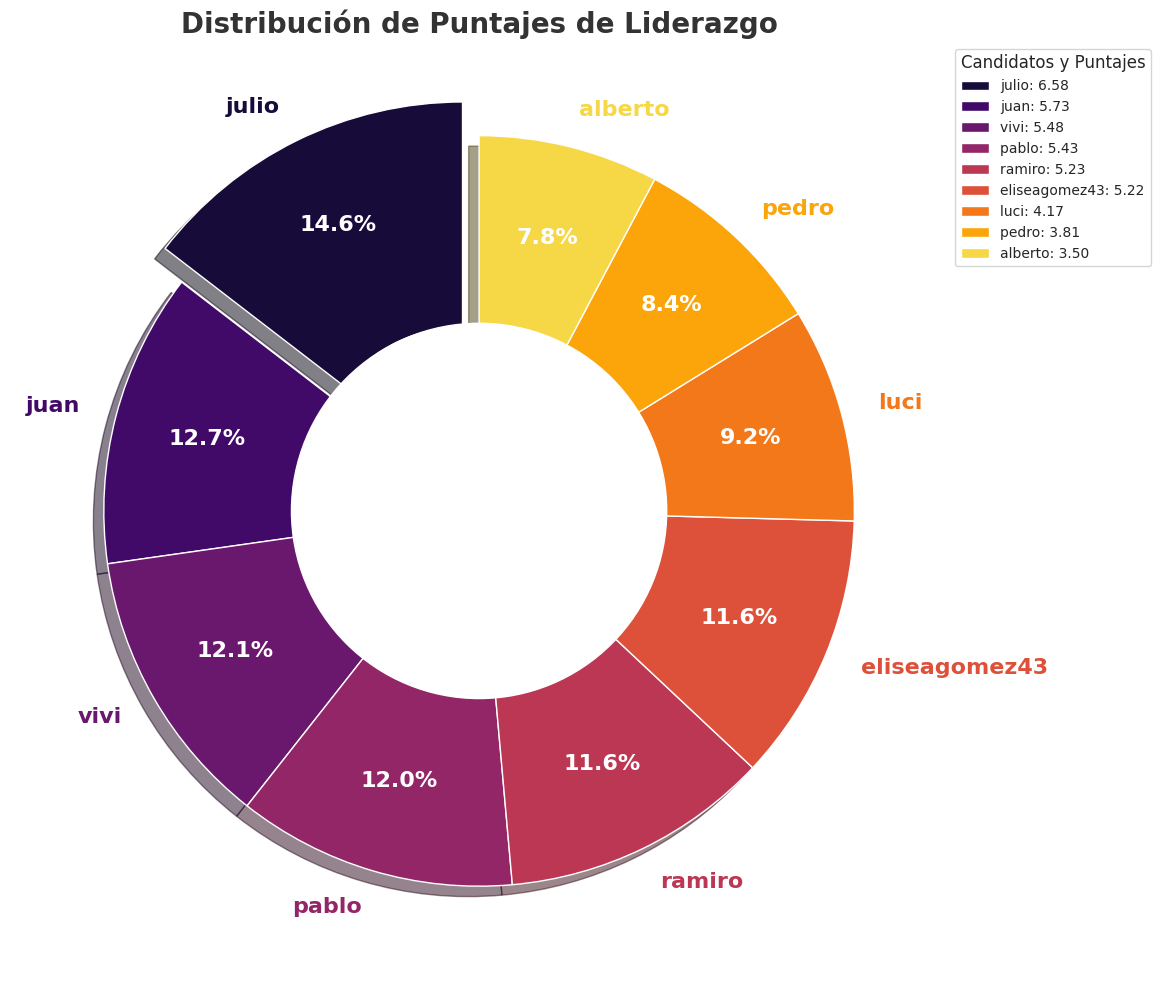

In [8]:
df_liderazgo = df[['Nombre', 'Puntaje_Liderazgo']].sort_values('Puntaje_Liderazgo', ascending=False)

sns.set_style("whitegrid")
plt.figure(figsize=(14, 10), facecolor='none')

colors = sns.color_palette("inferno", n_colors=len(df_liderazgo))

sizes = df_liderazgo['Puntaje_Liderazgo'] * 2

wedges, texts, autotexts = plt.pie(df_liderazgo['Puntaje_Liderazgo'],
                                   labels=df_liderazgo['Nombre'],
                                   autopct=lambda pct: f'{pct:.1f}%' if pct > 5 else '',
                                   pctdistance=0.75,
                                   startangle=90,
                                   explode=[0.1 if i == df_liderazgo['Puntaje_Liderazgo'].idxmax() else 0 for i in range(len(df_liderazgo))],
                                   shadow=True,
                                   colors=colors,
                                   wedgeprops=dict(width=0.6))

for i, text in enumerate(texts):
    text.set_fontsize(16)
    text.set_fontweight('bold')
    text.set_color(colors[i])

for i, autotext in enumerate(autotexts):
    autotext.set_fontsize(16)
    autotext.set_fontweight('bold')
    autotext.set_color('white')

plt.title('Distribución de Puntajes de Liderazgo', fontsize=20, fontweight='bold', color='#333333')

legend_labels = [f"{name}: {score:.2f}" for name, score in zip(df_liderazgo['Nombre'], df_liderazgo['Puntaje_Liderazgo'])]
plt.legend(wedges, legend_labels,
           title="Candidatos y Puntajes",
           loc="upper left",
           bbox_to_anchor=(1, 0, 0.5, 1),
           fontsize=10,
           title_fontsize=12)

centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.tight_layout()
plt.show()